# Notebook 0: Python Data Science Foundations

## Objectives
By the end of this notebook, you will be able to:
1.  **Manipulate DataFrames**: Use pandas to load, inspect, and modify datasets.
2.  **Summarize Data**: Calculate summary statistics and aggregate data using `groupby`.
3.  **Visualize Data**: Create basic plots using `matplotlib` and understand the figure/axes structure.
4.  **Apply Best Practices**: Use method chaining and modern plotting libraries for cleaner code.

## Prerequisites
- Basic Python knowledge (variables, functions, lists).
- Familiarity with `pandas` and `numpy` basics.


## Part 1: Data Manipulation with Pandas

### Why Pandas?
Pandas is the backbone of data science in Python. It provides the `DataFrame` object, which allows for efficient manipulation of tabular data. Key features include:
-   **Vectorized operations**: Faster than loops.
-   **Label-based indexing**: Access data by column name or index label.
-   **Flexible data handling**: Handles missing data, different types, and time series effortlessly.

### Key Concepts: GroupBy
The `groupby` operation involves three steps:
1.  **Split**: Break the data into groups based on some criteria.
2.  **Apply**: Apply a function to each group independently (e.g., sum, mean, count).
3.  **Combine**: Combine the results into a data structure.

This "Split-Apply-Combine" strategy is essential for summarizing data across categories (e.g., average GDP per continent).


In [1]:
import pandas as pd
import numpy as np

# Load Gapminder data (simulated for this notebook if file not present, or use library)
try:
    from gapminder import gapminder
except ImportError:
    # Fallback if gapminder is not installed
    print("Gapminder not found, creating sample data...")
    data = {
        'country': ['Afghanistan', 'Brazil', 'China', 'Germany', 'United States'] * 3,
        'continent': ['Asia', 'Americas', 'Asia', 'Europe', 'Americas'] * 3,
        'year': [1952]*5 + [1977]*5 + [2007]*5,
        'lifeExp': [28.8, 50.9, 44.0, 67.5, 68.4, 38.4, 61.5, 63.9, 72.5, 73.3, 43.8, 72.4, 72.9, 79.4, 78.2],
        'pop': [8425333, 56602560, 556263527, 69145952, 157553000] * 3,
        'gdpPercap': [779, 2108, 400, 7144, 13990] * 3
    }
    gapminder = pd.DataFrame(data)

# Basic Inspection
print("First 5 rows:")
print(gapminder.head())

# GroupBy Example: Average GDP per continent
print("\nAverage GDP per continent:")
byContinent = gapminder.groupby("continent")
print(byContinent["gdpPercap"].mean())

# Multiple Aggregations
print("\nLife Expectancy Stats by Continent:")
print(byContinent["lifeExp"].agg([np.min, np.max, np.mean]))


First 5 rows:
       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106

Average GDP per continent:
continent
Africa       2193.754578
Americas     7136.110356
Asia         7902.150428
Europe      14469.475533
Oceania     18621.609223
Name: gdpPercap, dtype: float64

Life Expectancy Stats by Continent:
              min     max       mean
continent                           
Africa     23.599  76.442  48.865330
Americas   37.579  80.653  64.658737
Asia       28.801  82.603  60.064903
Europe     43.585  81.757  71.903686
Oceania    69.120  81.235  74.326208


/opt/anaconda3/lib/python3.13/site-packages/gapminder/data.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/var/folders/kp/fpzklrkj45sfkstgvnwd2vjw0000gn/T/ipykernel_38001/1613701548.py:31: FutureWarning: The provided callable <function min at 0x1067ac900> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  print(byContinent["lifeExp"].agg([np.min, np.max, np.mean]))
/var/folders/kp/fpzklrkj45sfkstgvnwd2vjw0000gn/T/ipykernel_38001/1613701548.py:31: FutureWarning: The provided callable <function max at 0x1067ac7c0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavio

### Guided Example: Analyzing Titanic Data

Let's apply these concepts to the Titanic dataset. We want to understand survival rates by class and gender.

**Step 1: Load Data**
We'll use seaborn to load the dataset.

**Step 2: Grouping**
We will group by `pclass` and `sex`.

**Step 3: Aggregation**
We will calculate the mean of the `survived` column (which gives the survival rate).


In [2]:
import seaborn as sns

# Load dataset
titanic = sns.load_dataset('titanic')

# Group by Class and Sex
by_class_sex = titanic.groupby(['pclass', 'sex'])

# Calculate survival rate
survival_rates = by_class_sex['survived'].mean()
print("Survival Rates by Class and Sex:")
print(survival_rates)

# Unstack for better readability
print("\nFormatted Table:")
print(survival_rates.unstack())


Survival Rates by Class and Sex:
pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64

Formatted Table:
sex       female      male
pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447


## Part 2: Visualization with Matplotlib

### The Figure and Axes
Matplotlib plots are built on a hierarchy:
1.  **Figure**: The overall window or page that everything is drawn on.
2.  **Axes**: The area where data is plotted (what we think of as "a plot"). A Figure can contain multiple Axes.

### Subplots
Creating a grid of subplots allows you to compare different views of data side-by-side. The `plt.subplots()` function is the most convenient way to create a Figure and a set of Axes at once.


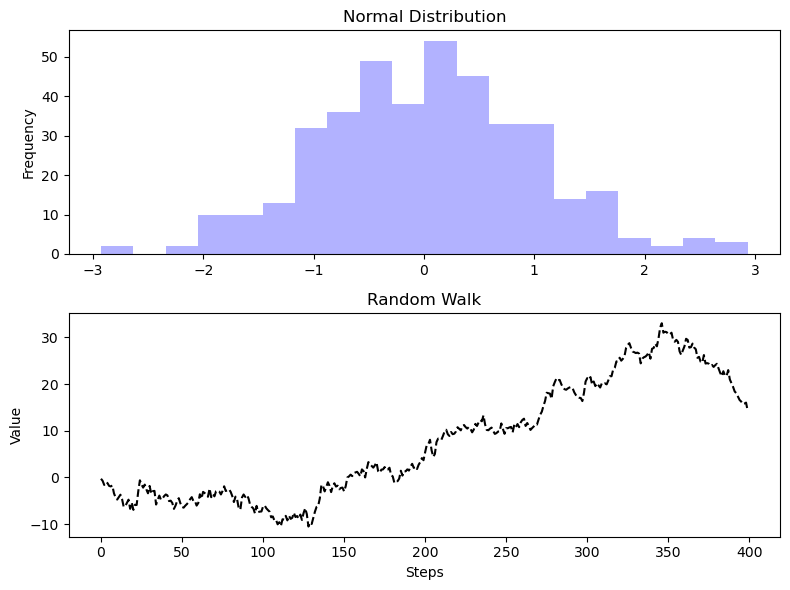

In [3]:
import matplotlib.pyplot as plt

# Create a grid of 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Generate random data
ran_nums = np.random.standard_normal(400)
ran_walk = ran_nums.cumsum()

# Plot 1: Histogram
ax1.hist(ran_nums, bins=20, color="blue", alpha=0.3)
ax1.set_title("Normal Distribution")
ax1.set_ylabel("Frequency")

# Plot 2: Random Walk
ax2.plot(ran_walk, color="black", linestyle="dashed")
ax2.set_title("Random Walk")
ax2.set_xlabel("Steps")
ax2.set_ylabel("Value")

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()


## Exercises

### Task 1: Gapminder Analysis
Using the `gapminder` dataset:
1.  Filter the data for the year 2007.
2.  Group the data by `continent`.
3.  Calculate the total population (`pop`) for each continent.
4.  Create a bar chart showing the total population per continent.

### Task 2: Titanic Visualization
Using the `titanic` dataset:
1.  Create a figure with 1 row and 2 columns.
2.  In the first subplot, create a histogram of passenger `age`.
3.  In the second subplot, create a bar chart of `survived` counts (how many died vs survived).
    *   *Hint*: You can use `titanic['survived'].value_counts()` to get the data for the bar chart.


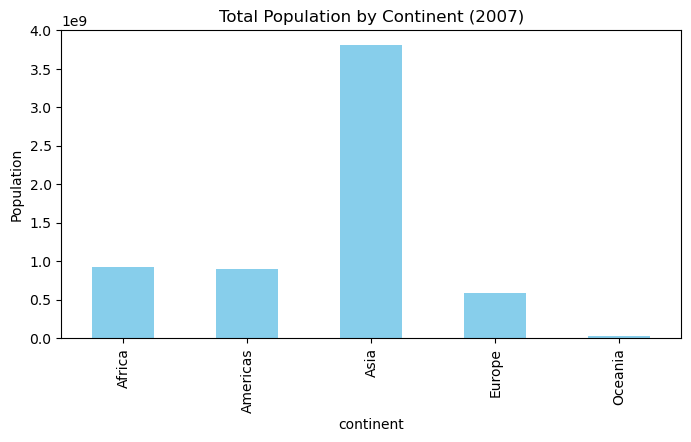

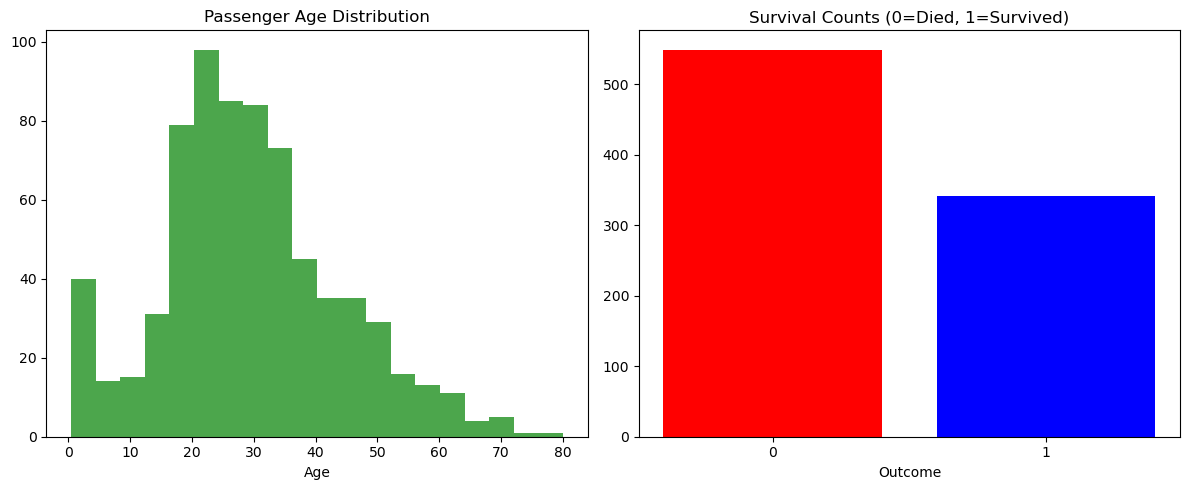

In [4]:
# --- SOLUTION TASK 1 ---
gapminder_2007 = gapminder[gapminder['year'] == 2007]
pop_by_continent = gapminder_2007.groupby('continent')['pop'].sum()

plt.figure(figsize=(8, 4))
pop_by_continent.plot(kind='bar', color='skyblue')
plt.title("Total Population by Continent (2007)")
plt.ylabel("Population")
plt.show()

# --- SOLUTION TASK 2 ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of Age
ax1.hist(titanic['age'].dropna(), bins=20, color='green', alpha=0.7)
ax1.set_title("Passenger Age Distribution")
ax1.set_xlabel("Age")

# Bar chart of Survival
survival_counts = titanic['survived'].value_counts()
ax2.bar(survival_counts.index.astype(str), survival_counts.values, color=['red', 'blue'])
ax2.set_title("Survival Counts (0=Died, 1=Survived)")
ax2.set_xlabel("Outcome")

plt.tight_layout()
plt.show()


## Industry Best Practices

### Modern Pandas: Method Chaining
Instead of saving intermediate variables, fluent code often uses "method chaining".
```python
# Traditional
df_2007 = gapminder[gapminder['year'] == 2007]
grouped = df_2007.groupby('continent')
result = grouped['pop'].sum()

# Method Chaining
result = (
    gapminder
    .query("year == 2007")
    .groupby("continent")["pop"]
    .sum()
)
```

### Visualization Libraries
While `matplotlib` is the foundation, modern libraries offer higher-level abstractions:
*   **Seaborn**: Built on matplotlib, provides beautiful default styles and complex statistical plots (e.g., `sns.boxplot`, `sns.heatmap`) with less code.
*   **Plotly**: Creates interactive, web-ready plots where users can zoom and hover to see data values.

### Tidy Data
Ensure your data is "tidy":
1.  Each variable forms a column.
2.  Each observation forms a row.
3.  Each type of observational unit forms a table.
Pandas is optimized for tidy data. If your data is "wide" (e.g., years as columns), use `pd.melt()` to reshape it.
